1. Simple KNN

In [31]:
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


# Load data and split into feature and target
train_data = np.loadtxt("./training/dataset_training.txt", delimiter = ",")
test_data = np.loadtxt("./testing/dataset_testing.txt", delimiter = ",")


1. default knn scikit tool

In [35]:
### evalution with default scikit tool

# traning 
# label/target
train_t = train_data[:, -1]
# features
train_x = train_data[:, :-1]

# testing 
test_t = test_data[:, -1]
test_x = test_data[:, :-1]

# Create knn for by defult k = 5 (can be changed using n_neighbors=x)
knn = KNeighborsClassifier()

# Train the model with the training sets
knn.fit(train_x, train_t)

# predict the response for train dataset
pred_train = knn.predict(train_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy on training dataset:",metrics.accuracy_score(train_t, pred_train))
print("F1-score on training dataset:", f1_score(train_t, pred_train))
print("---------------")
# Predict the response for test dataset
pred_t = knn.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy on testing dataset:",metrics.accuracy_score(test_t, pred_t))
print("F1-score on testing dataset:", f1_score(test_t, pred_t))

Accuracy on training dataset: 0.862125
F1-score on training dataset: 0.7969066470263303
---------------
Accuracy on testing dataset: 0.774
F1-score on testing dataset: 0.6789772727272726


2. Determine the value of K by observing the behaviour it perform on training dataset and testing dataset
The determination of the K value varies greatly depending on the case. 

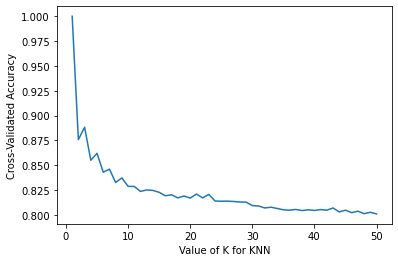

best performance k = 1 training accuracy = 1.000000 on training dataset


In [21]:
#### regular check accuracy on traning dataset 
k_range = range(1, 51)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_t)
    pred_t = knn.predict(train_x)
    score = metrics.accuracy_score(train_t, pred_t)
    k_scores.append(score)
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

i = 1
maxi = -1
c = -1
for item in k_scores:
    if item > maxi:
        maxi = item
        c = i
    i += 1
# k_scores
print("best performance k = %d training accuracy = %f on training dataset" % (c, maxi))

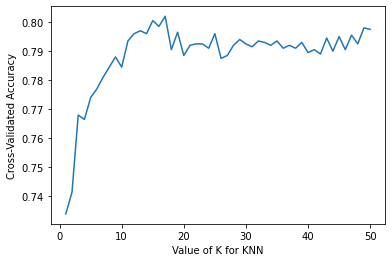

best performance k = 17 training accuracy = 0.802000 on testing dataset


In [22]:
#### regular check accuracy on testing dataset 
k_range = range(1, 51)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_t)
    pred_t = knn.predict(test_x)
    score = metrics.accuracy_score(test_t, pred_t)
    k_scores.append(score)
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

i = 1
maxi = -1
c = -1
for item in k_scores:
    if item > maxi:
        maxi = item
        c = i
    i += 1
# k_scores
print("best performance k = %d training accuracy = %f on testing dataset" % (c, maxi))

3. Apply cross validation see if it will affect the performance 

In [23]:
#### cross validation  

# Create a new KNN model for K = 5
knn_cv = KNeighborsClassifier()

# Train model with cross-validation of 10 
n = 10
cv_result = cross_validate(knn_cv, train_x, train_t, cv=n, return_estimator=True)
estimator = cv_result['estimator']
# print(cv_result)
# print(estimator)
print("Training data set - cross validation:")
c = 1
accuracy_scores = []
for i in range(n):
    pred_train_cv = estimator[i].predict(train_x)
    # Model Accuracy, how often is the classifier correct?
    accuracy_score = metrics.accuracy_score(train_t, pred_train_cv)
    accuracy_scores.append(accuracy_score)
    print("acccuracy on model %d: %f" % (c,accuracy_score))
    c+=1
accuracy_scores = np.array(accuracy_scores)
print("Average Accuracy: %f " % (accuracy_scores.mean()))
print("-----------------------")
print("Testing data set - cross validation:")
c = 1
accuracy_scores = []
for i in range(n):
    pred_test_cv = estimator[i].predict(test_x)
    # Model Accuracy, how often is the classifier correct?
    accuracy_score = metrics.accuracy_score(test_t, pred_test_cv)
    accuracy_scores.append(accuracy_score)
    print("acccuracy on model %d: %f" % (c,accuracy_score))
    c+=1
accuracy_scores = np.array(accuracy_scores)
print("Average Accuracy: %f" % (accuracy_scores.mean()))
     

Training data set - cross validation:
acccuracy on model 1: 0.852625
acccuracy on model 2: 0.849500
acccuracy on model 3: 0.855625
acccuracy on model 4: 0.850125
acccuracy on model 5: 0.854375
acccuracy on model 6: 0.854875
acccuracy on model 7: 0.850750
acccuracy on model 8: 0.852375
acccuracy on model 9: 0.851750
acccuracy on model 10: 0.854750
Average Accuracy: 0.852675 
-----------------------
Testing data set - cross validation:
acccuracy on model 1: 0.777000
acccuracy on model 2: 0.774000
acccuracy on model 3: 0.776500
acccuracy on model 4: 0.779000
acccuracy on model 5: 0.775000
acccuracy on model 6: 0.776500
acccuracy on model 7: 0.773000
acccuracy on model 8: 0.771000
acccuracy on model 9: 0.776000
acccuracy on model 10: 0.779000
Average Accuracy: 0.775700


4. Apply different k on cross validation see if it will affect the performance 

the best k is 19 accuracy is 0.798375


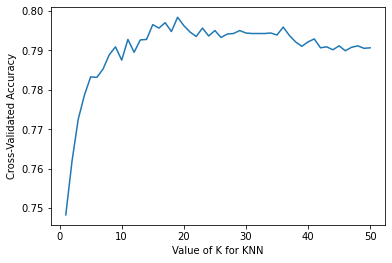

In [27]:
### using cross validation 
###
k_range = range(1, 51)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_x, train_t, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
# plot to see clearly
plt.plot(k_range, k_scores)
print('the best k is %d accuracy is %f' % (k_range[k_scores.index(max(k_scores))], max(k_scores)))
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# i = 1
# for item in k_scores:
#     print(i, item)
#     i += 1
# k_scores

In [ ]:
5. KNN with random split; Accuracy is varies by different split 

In [34]:
# Load all data and split into feature and target
data1 = np.loadtxt("./training/dataset_training.txt", delimiter = ",")
data2 = np.loadtxt("./testing/dataset_testing.txt", delimiter = ",")
data = np.concatenate((data1, data2), axis=0)
target = data[:, -1]
feature = data[:, :-1]

# Shuffle the dataset before splitting
# Split dataset into training set and test set
# 70% training and 30% test
train_x, test_x, train_t, test_t = train_test_split(feature, target, test_size=0.3, shuffle=True) 

# Create knn for k = 5 (can be changed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model with the training sets
knn.fit(train_x, train_t)

# Predict the response for test dataset
pred_t = knn.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_t, pred_t))

# Create a new KNN model for K = 5
knn_cv = KNeighborsClassifier(n_neighbors=5)

# Train model with cross-validation of 10 
cv_scores = cross_val_score(knn_cv, feature, target, cv=10)


print(cv_scores)
# The mean score and the 95% confidence interval of the score estimate are hence given by:
# link: https://scikit-learn.org/stable/modules/cross_validation.html
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.7746666666666666
[0.793 0.788 0.789 0.781 0.803 0.783 0.783 0.817 0.781 0.786]
Accuracy: 0.79 (+/- 0.02)


5. Preprocessing: Normalize the data

In [37]:
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Load data and split into feature and target
train_data2 = np.loadtxt("./training/dataset_training.txt", delimiter = ",")
test_data2 = np.loadtxt("./testing/dataset_testing.txt", delimiter = ",")

train_t2 = train_data2[:, -1]
train_x2 = train_data2[:, :-1]

test_t2 = test_data2[:, -1]
test_x2 = test_data2[:, :-1]

# Normalize feature attributes [0,1]
# normalize train set on each non-zero feature with "max" if axis=0
train_x2 = preprocessing.normalize(train_data2[:, :-1], norm='max', axis=0)

# normalize test set on each non-zero feature with "max" if axis=0
test_x2 = preprocessing.normalize(test_data2[:, :-1], norm='max', axis=0)

In [42]:
# Regular k
# Create knn for by defult k = 5 (can be changed using n_neighbors=x)
knn_norm = KNeighborsClassifier()

# Train the model with the training sets
knn_norm.fit(train_x2, train_t2)

# Predict the response for test dataset
pred_train_2 = knn_norm.predict(train_x2)

print("After normalization:")
# Model Accuracy, how often is the classifier correct?
print("Accuracy on training dataset:",metrics.accuracy_score(train_t2, pred_train_2))
print("F1-score on training dataset:", f1_score(train_t2, pred_train_2))
print("---------------")

# Predict the response for test dataset
pred_test_2 = knn_norm.predict(test_x2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy on testing dataset:",metrics.accuracy_score(test_t2, pred_test_2))
print("F1-score on testing dataset:", f1_score(test_t2, pred_test_2))

After normalization:
Accuracy on training dataset: 0.917875
F1-score on training dataset: 0.8793831466862493
---------------
Accuracy on testing dataset: 0.869
F1-score on testing dataset: 0.8098693759071118


6. Test the normalized data on different k

the best k is 1 accuracy on training= 1.000000


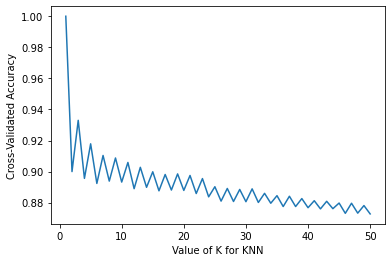

In [47]:
#### regular 
k_range_norm = range(1, 51)
k_scores_norm = []
# use iteration to caclulator different k in models, then return the average accuracy 
for k in k_range_norm:
    knn_norm2 = KNeighborsClassifier(n_neighbors=k)
    knn_norm2.fit(train_x2, train_t2)
    pred_t3 = knn_norm2.predict(train_x2)
    k_scores_norm.append(metrics.accuracy_score(train_t2, pred_t3))
# plot to see clearly
plt.plot(k_range_norm, k_scores_norm)
print('the best k is %d accuracy on training= %f'% (k_range_norm[k_scores_norm.index(max(k_scores_norm))], max(k_scores_norm)))
# sorted_k_scores = {sorted(k_scores, reverse=True, key=lambda item: item[1])}      
# print('the top10 k is %d' %s )
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# i = 1
# for item in k_scores_norm:
#     print(i, item)
#     i += 1
# k_scores



the best k is 9 accuracy on testing = 0.873000


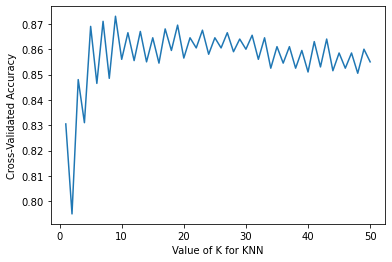

In [48]:
#### regular 
k_range_norm = range(1, 51)
k_scores_norm = []
# use iteration to caclulator different k in models, then return the average accuracy 
for k in k_range_norm:
    knn_norm2 = KNeighborsClassifier(n_neighbors=k)
    knn_norm2.fit(train_x2, train_t2)
    pred_t3 = knn_norm2.predict(test_x2)
    k_scores_norm.append(metrics.accuracy_score(test_t2, pred_t3))
# plot to see clearly
plt.plot(k_range_norm, k_scores_norm)
print('the best k is %d accuracy on testing = %f'% (k_range_norm[k_scores_norm.index(max(k_scores_norm))], max(k_scores_norm)))
# sorted_k_scores = {sorted(k_scores, reverse=True, key=lambda item: item[1])}      
# print('the top10 k is %d' %s )
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


7. Testing normalized data on cross validation 
Compare with After normalization on regular KNN:
Accuracy on training dataset: 0.917875
F1-score on training dataset: 0.8793831466862493
Accuracy on testing dataset: 0.869
F1-score on testing dataset: 0.8098693759071118

In [49]:
#### cross validation  

# Create a new KNN model for K = 5
knn_cv = KNeighborsClassifier()

# Train model with cross-validation of 10 
n = 10
cv_result = cross_validate(knn_cv, train_x2, train_t2, cv=n, return_estimator=True)
estimator = cv_result['estimator']

print("Training data set - cross validation:")
c = 1
accuracy_scores = []
for i in range(n):
    pred_train_cv = estimator[i].predict(train_x2)
    # Model Accuracy, how often is the classifier correct?
    accuracy_score = metrics.accuracy_score(train_t2, pred_train_cv)
    accuracy_scores.append(accuracy_score)
    print("acccuracy on model %d: %f" % (c,accuracy_score))
    c+=1
accuracy_scores = np.array(accuracy_scores)
print("Average Accuracy: %f " % (accuracy_scores.mean()))
print("-----------------------")
print("Testing data set - cross validation:")
c = 1
accuracy_scores = []
for i in range(n):
    pred_test_cv = estimator[i].predict(test_x2)
    # Model Accuracy, how often is the classifier correct?
    accuracy_score = metrics.accuracy_score(test_t2, pred_test_cv)
    accuracy_scores.append(accuracy_score)
    print("acccuracy on model %d: %f" % (c,accuracy_score))
    c+=1
accuracy_scores = np.array(accuracy_scores)
print("Average Accuracy: %f" % (accuracy_scores.mean()))
     

Training data set - cross validation:
acccuracy on model 1: 0.911750
acccuracy on model 2: 0.910875
acccuracy on model 3: 0.911875
acccuracy on model 4: 0.910875
acccuracy on model 5: 0.910250
acccuracy on model 6: 0.910625
acccuracy on model 7: 0.910625
acccuracy on model 8: 0.908625
acccuracy on model 9: 0.911625
acccuracy on model 10: 0.910500
Average Accuracy: 0.910763 
-----------------------
Testing data set - cross validation:
acccuracy on model 1: 0.862500
acccuracy on model 2: 0.867500
acccuracy on model 3: 0.867500
acccuracy on model 4: 0.863000
acccuracy on model 5: 0.861000
acccuracy on model 6: 0.864500
acccuracy on model 7: 0.871500
acccuracy on model 8: 0.867000
acccuracy on model 9: 0.868500
acccuracy on model 10: 0.869000
Average Accuracy: 0.866200


8. Apply k=19 in cross valdiation 

In [55]:
#### cross validation  

# Create a new KNN model for K = 5
knn_cv = KNeighborsClassifier(n_neighbors=19)

# Train model with cross-validation of 10 
n = 10
cv_result = cross_validate(knn_cv, train_x2, train_t2, cv=n, return_estimator=True)
estimator = cv_result['estimator']

print("Training data set - cross validation:")
c = 1
accuracy_scores = []
for i in range(n):
    pred_train_cv = estimator[i].predict(train_x2)
    # Model Accuracy, how often is the classifier correct?
    accuracy_score = metrics.accuracy_score(train_t2, pred_train_cv)
    accuracy_scores.append(accuracy_score)
    print("acccuracy on model %d: %f" % (c,accuracy_score))
    c+=1
accuracy_scores = np.array(accuracy_scores)
print("Average Accuracy: %f " % (accuracy_scores.mean()))
print("-----------------------")
print("Testing data set - cross validation:")
c = 1
accuracy_scores = []
for i in range(n):
    pred_test_cv = estimator[i].predict(test_x2)
    # Model Accuracy, how often is the classifier correct?
    accuracy_score = metrics.accuracy_score(test_t2, pred_test_cv)
    accuracy_scores.append(accuracy_score)
    print("acccuracy on model %d: %f" % (c,accuracy_score))
    c+=1
accuracy_scores = np.array(accuracy_scores)
print("Average Accuracy: %f" % (accuracy_scores.mean()))
     

Training data set - cross validation:
acccuracy on model 1: 0.897500
acccuracy on model 2: 0.893625
acccuracy on model 3: 0.894000
acccuracy on model 4: 0.891625
acccuracy on model 5: 0.895875
acccuracy on model 6: 0.894375
acccuracy on model 7: 0.894250
acccuracy on model 8: 0.895625
acccuracy on model 9: 0.893500
acccuracy on model 10: 0.892875
Average Accuracy: 0.894325 
-----------------------
Testing data set - cross validation:
acccuracy on model 1: 0.870500
acccuracy on model 2: 0.866500
acccuracy on model 3: 0.864000
acccuracy on model 4: 0.863000
acccuracy on model 5: 0.865000
acccuracy on model 6: 0.868000
acccuracy on model 7: 0.867500
acccuracy on model 8: 0.864500
acccuracy on model 9: 0.863000
acccuracy on model 10: 0.868000
Average Accuracy: 0.866000


9. Tuning with different parameter in KNeighborsClassifier
Here we choose below 3 parameters:
n_neighbors
weights
p

In [56]:
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Load data and split into feature and target
train_data3 = np.loadtxt("./training/dataset_training.txt", delimiter = ",")
test_data3 = np.loadtxt("./testing/dataset_testing.txt", delimiter = ",")

train_t3 = train_data3[:, -1]
train_x3 = train_data3[:, :-1]

test_t3 = test_data3[:, -1]
test_x3 = test_data3[:, :-1]

# Normalize feature attributes [0,1]
# normalize train set on each non-zero feature with "max" if axis=0
train_x3 = preprocessing.normalize(train_data3[:, :-1], norm='max', axis=0)

# normalize test set on each non-zero feature with "max" if axis=0
test_x3 = preprocessing.normalize(test_data3[:, :-1], norm='max', axis=0)

s = -1
x_t = -1
y_t = ''
z = -1
counter = 1
for x in range(1, 51):
    for y in ['uniform', 'distance']:
        for z in range(1,4):
            knn_tmp = KNeighborsClassifier(n_neighbors=x, weights=y, p=z)
            knn_tmp.fit(train_x3, train_t3)
            pred_t = knn_tmp.predict(test_x3)
            acc = metrics.accuracy_score(test_t3, pred_t)
            print('%d. n_neighbors=%d, weights=%s, p=%d, accuracy=%f' % (counter, x, y, z, acc))
            if acc >= s:
                s = acc
                x_t = x
                y_t = y
                z_t = z
            counter+=1
print('n_neighbors=%d, weights=%s, p=%d, max_accuracy=%f' % (x_t, y_t, z_t, s))            

1. n_neighbors=1, weights=uniform, p=1, accuracy=0.809500
2. n_neighbors=1, weights=uniform, p=2, accuracy=0.830500
3. n_neighbors=1, weights=uniform, p=3, accuracy=0.826500
4. n_neighbors=1, weights=distance, p=1, accuracy=0.809500
5. n_neighbors=1, weights=distance, p=2, accuracy=0.830500
6. n_neighbors=1, weights=distance, p=3, accuracy=0.826500
7. n_neighbors=2, weights=uniform, p=1, accuracy=0.785500
8. n_neighbors=2, weights=uniform, p=2, accuracy=0.795000
9. n_neighbors=2, weights=uniform, p=3, accuracy=0.790000
10. n_neighbors=2, weights=distance, p=1, accuracy=0.809500
11. n_neighbors=2, weights=distance, p=2, accuracy=0.830500
12. n_neighbors=2, weights=distance, p=3, accuracy=0.826500
13. n_neighbors=3, weights=uniform, p=1, accuracy=0.847000
14. n_neighbors=3, weights=uniform, p=2, accuracy=0.848000
15. n_neighbors=3, weights=uniform, p=3, accuracy=0.844000
16. n_neighbors=3, weights=distance, p=1, accuracy=0.846500
17. n_neighbors=3, weights=distance, p=2, accuracy=0.84800

137. n_neighbors=23, weights=distance, p=2, accuracy=0.869000
138. n_neighbors=23, weights=distance, p=3, accuracy=0.858500
139. n_neighbors=24, weights=uniform, p=1, accuracy=0.858000
140. n_neighbors=24, weights=uniform, p=2, accuracy=0.858000
141. n_neighbors=24, weights=uniform, p=3, accuracy=0.848500
142. n_neighbors=24, weights=distance, p=1, accuracy=0.876500
143. n_neighbors=24, weights=distance, p=2, accuracy=0.871000
144. n_neighbors=24, weights=distance, p=3, accuracy=0.863500
145. n_neighbors=25, weights=uniform, p=1, accuracy=0.872500
146. n_neighbors=25, weights=uniform, p=2, accuracy=0.864500
147. n_neighbors=25, weights=uniform, p=3, accuracy=0.855500
148. n_neighbors=25, weights=distance, p=1, accuracy=0.872500
149. n_neighbors=25, weights=distance, p=2, accuracy=0.867500
150. n_neighbors=25, weights=distance, p=3, accuracy=0.857500
151. n_neighbors=26, weights=uniform, p=1, accuracy=0.861500
152. n_neighbors=26, weights=uniform, p=2, accuracy=0.860500
153. n_neighbors

271. n_neighbors=46, weights=uniform, p=1, accuracy=0.851500
272. n_neighbors=46, weights=uniform, p=2, accuracy=0.852500
273. n_neighbors=46, weights=uniform, p=3, accuracy=0.848000
274. n_neighbors=46, weights=distance, p=1, accuracy=0.867500
275. n_neighbors=46, weights=distance, p=2, accuracy=0.865000
276. n_neighbors=46, weights=distance, p=3, accuracy=0.858500
277. n_neighbors=47, weights=uniform, p=1, accuracy=0.862000
278. n_neighbors=47, weights=uniform, p=2, accuracy=0.858500
279. n_neighbors=47, weights=uniform, p=3, accuracy=0.854000
280. n_neighbors=47, weights=distance, p=1, accuracy=0.865500
281. n_neighbors=47, weights=distance, p=2, accuracy=0.861500
282. n_neighbors=47, weights=distance, p=3, accuracy=0.855000
283. n_neighbors=48, weights=uniform, p=1, accuracy=0.851000
284. n_neighbors=48, weights=uniform, p=2, accuracy=0.850500
285. n_neighbors=48, weights=uniform, p=3, accuracy=0.847500
286. n_neighbors=48, weights=distance, p=1, accuracy=0.866500
287. n_neighbors=

Use the parameter resulted best performance to do evaluation: n_neighbors=12, weights=distance, p=1, max_accuracy=0.878500


In [67]:
# n_neighbors=12, weights=distance, p=1
# Create knn for by defult k = 5 (can be changed using n_neighbors=x)
knn_norm_new = KNeighborsClassifier(n_neighbors=12, weights='distance', p=1)

# Train the model with the training sets
knn_norm_new.fit(train_x2, train_t2)

# Predict the response for training dataset
pred_train2_new = knn_norm_new.predict(train_x2)

# Model Accuracy, how often is the classifier correct?
print("Evaluation on training data set:")
print("Accuracy:",metrics.accuracy_score(train_t2, pred_train2_new))

tn, fp, fn, tp = confusion_matrix(train_t2, pred_train2_new).ravel()
print("tn", "fp", "fn", "tp")
print(tn, fp, fn, tp)

print('F1-SCORE = %f' %(f1_score(train_t2, pred_train2_new)))
print("--------------------")

# n_neighbors=12, weights=distance, p=1
# Create knn for by defult k = 5 (can be changed using n_neighbors=x)
knn_norm_new = KNeighborsClassifier(n_neighbors=12, weights='distance', p=1)

# Train the model with the training sets
knn_norm_new.fit(train_x2, train_t2)

# Predict the response for test dataset
pred_test2_new = knn_norm_new.predict(test_x2)

# Model Accuracy, how often is the classifier correct?
print("Evaluation on testing data set:")
print("Accuracy:",metrics.accuracy_score(test_t2, pred_test2_new))

tn, fp, fn, tp = confusion_matrix(test_t2, pred_test2_new).ravel()
print("tn", "fp", "fn", "tp")
print(tn, fp, fn, tp)
print('F1-SCORE = %f' %(f1_score(test_t2, pred_test2_new)))


Evaluation on training data set:
Accuracy: 1.0
tn fp fn tp
5133 0 0 2867
F1-SCORE = 1.000000
--------------------
Evaluation on testing data set:
Accuracy: 0.8785
tn fp fn tp
1209 38 205 548
F1-SCORE = 0.818521


Apply Cross Validation to prevent Overfitting

In [93]:
#### cross validation  

# Create a new KNN model for best performance paramter obtained previously
knn_cv = KNeighborsClassifier(n_neighbors=12, weights='distance', p=1)

# Train model with cross-validation of 10 
n = 10
cv_result = cross_validate(knn_cv, train_x2, train_t2, cv=n, return_estimator=True)
estimator = cv_result['estimator']

print("Training data set - cross validation:")
c = 1
accuracy_scores = []
for i in range(n):
    pred_train_cv = estimator[i].predict(train_x2)
    # Model Accuracy, how often is the classifier correct?
    accuracy_score = metrics.accuracy_score(train_t2, pred_train_cv)
    accuracy_scores.append(accuracy_score)
    print("acccuracy on model %d: %f" % (c,accuracy_score))
    c+=1
accuracy_scores = np.array(accuracy_scores)
print("Average Accuracy: %f " % (accuracy_scores.mean()))
print("-----------------------")
print("Testing data set - cross validation:")
c = 1
maxscore = -1
best_result_test = []
accuracy_scores = []
model = -1
for i in range(n):
    pred_test_cv = estimator[i].predict(test_x2)
    # Model Accuracy, how often is the classifier correct?
    accuracy_score = metrics.accuracy_score(test_t2, pred_test_cv)
    if accuracy_score > maxscore:
        maxscore = accuracy_score
        best_result = pred_test_cv
        model = c
    accuracy_scores.append(accuracy_score)
    print("acccuracy on model %d: %f" % (c,accuracy_score))
    c+=1
accuracy_scores = np.array(accuracy_scores)
print("Average Accuracy: %f" % (accuracy_scores.mean()))
print("-------------------------------")

pred_train_cv = estimator[model-1].predict(train_x2)
pred_test_cv = estimator[model-1].predict(test_x2)
# Model Accuracy, how often is the classifier correct?
print("Final Evaluation on training data set:")
print("Accuracy:",metrics.accuracy_score(train_t2, pred_train_cv))

tn, fp, fn, tp = confusion_matrix(train_t2, pred_train_cv).ravel()
print("tn", "fp", "fn", "tp")
print(tn, fp, fn, tp)

print('F1-SCORE = %f' %(f1_score(train_t2, pred_train_cv)))
print("--------------------")

# Model Accuracy, how often is the classifier correct?
print("Final Evaluation on testing data set:")
print("Accuracy:",metrics.accuracy_score(test_t2, pred_test_cv))

tn, fp, fn, tp = confusion_matrix(test_t2, pred_test_cv).ravel()
print("tn", "fp", "fn", "tp")
print(tn, fp, fn, tp)
print('F1-SCORE = %f' %(f1_score(test_t2, pred_test_cv)))

Training data set - cross validation:
acccuracy on model 1: 0.987500
acccuracy on model 2: 0.989500
acccuracy on model 3: 0.989750
acccuracy on model 4: 0.987750
acccuracy on model 5: 0.987000
acccuracy on model 6: 0.985250
acccuracy on model 7: 0.987875
acccuracy on model 8: 0.988750
acccuracy on model 9: 0.987125
acccuracy on model 10: 0.986500
Average Accuracy: 0.987700 
-----------------------
Testing data set - cross validation:
acccuracy on model 1: 0.871000
acccuracy on model 2: 0.872000
acccuracy on model 3: 0.878500
acccuracy on model 4: 0.868000
acccuracy on model 5: 0.873000
acccuracy on model 6: 0.878000
acccuracy on model 7: 0.874500
acccuracy on model 8: 0.874000
acccuracy on model 9: 0.867000
acccuracy on model 10: 0.869500
Average Accuracy: 0.872550
-------------------------------
Final Evaluation on training data set:
Accuracy: 0.98975
tn fp fn tp
5117 16 66 2801
F1-SCORE = 0.985574
--------------------
Final Evaluation on testing data set:
Accuracy: 0.8785
tn fp fn tp

Other: Export prediction on testing dataset to txt file for ensemble

In [94]:
a_file = open("predictor_2_y.txt", "w")
for row in best_result:
    a_file.write(str(row))
    a_file.write("\n")

a_file.close()